# Modeling

### Import

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics as metrics

pd.set_option('display.max_columns', None)

### Load data

In [420]:
df = pd.read_csv('data/clean_df.csv')

In [421]:
df.head(5)

,name,industry,office,size,review_counts,salaries_count,jobs_count,interviews_count,benefits_count,website,company_type,revenue,head_quarter,founded,interview_possitive,interview_negative,interview_neutral,interview_difficulty,benefits_score,rating,total_insurance_health_wellness_benefits,health_insurance,dental_insurance,FSA,vision insurance,HSA,life_insurance,supplemental_life_insurance,disability_insurance,occupational_accident_insurance,health_care_on_site,mental_health_care,retiree_health_and_medical,accidental_death_and_dismemberment_insurance,total_financial_retirement_benefits,pension_plan,plan_401K,retirement_plan,employee_stock_purcase_plan,performance_bonus,stock_options,equity_incentive_plan,supplemental_workers_compensation,charity_gift_matching,total_family_parenting_benefits,maternity_paternity_leave,work_from_home,fertility_assistance,dependent_care,adoption_assistance,childcare,flexible_hour,military_leave,family_medical_leave,unpaid_extended_leave,total_vacation_time_off_benefits,vacation_paid_time_off,sick_days,paid_holidays,volunteer_time_off,sabbatical,bereavement_leave,total_perk_discounts_benefits,employee_discount,free_lunch_or_snacks,employee_assistance_program,gym_membership,commuter_checks_and_assistance,pet_friendly_worksplace,mobile_phone_discount,company_car,company_social_events,travel_concierge,legal_assistance,total_professional_support_benefits,diversity_program,job_training,professional_development,apprenticeship,tuition_assistance,category,state,company_rank
0,Google,Internet,35,3,19400.0,43800.0,1900.0,13000.0,4700.0,https://www.google.com/,Public,8,"Mountain View, CA",1998.0,0.61,0.15,0.23,3.3,4.7,4.5,13,1,1,1,1,1,1,1,1,1,1,1,1,1,7,0,1,1,0,1,1,1,1,1,8,1,1,0,0,1,1,1,1,1,1,5,1,1,1,1,0,1,11,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,0,1,Information Technology,CA,2
1,Microsoft,Computer Hardware & Software,34,3,30300.0,68800.0,5700.0,10000.0,10000.0,https://www.microsoft.com/,Public,8,"Redmond, WA",1975.0,0.65,0.13,0.21,3.1,4.5,4.4,12,1,1,1,1,1,1,1,1,1,1,1,0,1,8,0,1,1,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,1,6,1,1,1,1,1,1,9,1,1,1,1,1,0,1,0,1,1,1,5,1,1,1,1,1,Information Technology,WA,2
2,Apple,Computer Hardware & Software,25,3,21600.0,63600.0,4200.0,8500.0,7100.0,https://www.apple.com/,Public,8,"Cupertino, CA",1976.0,0.65,0.15,0.20,3.0,4.5,4.3,12,1,1,1,1,1,1,1,1,1,0,1,1,1,7,0,1,1,1,0,1,1,1,1,9,1,1,1,1,1,1,0,1,1,1,6,1,1,1,1,1,1,9,1,1,1,1,1,0,1,0,1,1,1,4,1,1,1,0,1,Information Technology,CA,2
3,US Air Force,Federal Agencies,40,3,17100.0,19400.0,4800.0,1000.0,7600.0,https://www.af.mil/,Government,8,"Washington, DC",1947.0,0.70,0.05,0.24,2.2,4.5,4.2,11,1,1,0,1,0,1,1,1,1,1,1,1,1,4,1,1,1,0,0,0,0,1,0,9,1,0,1,1,1,1,1,1,1,1,6,1,1,1,1,1,1,10,1,1,1,1,1,0,1,1,1,1,1,5,1,1,1,1,1,Goverment,DC,2
4,Cisco Systems,Computer Hardware & Software,25,3,22400.0,42500.0,1900.0,4300.0,8000.0,https://www.cisco.com/,Private,8,"San Jose, CA",1984.0,0.69,0.11,0.19,3.0,4.2,4.2,13,1,1,1,1,1,1,1,1,1,1,1,1,1,8,0,1,1,1,1,1,1,1,1,10,1,1,1,1,1,1,1,1,1,1,5,1,1,1,1,0,1,9,1,1,1,1,1,0,1,0,1,1,1,5,1,1,1,1,1,Information Technology,CA,2


In [422]:
df.company_rank.value_counts().sort_index()

0    773
1    654
2    806
Name: company_rank, dtype: int64

### Baseline = 36%

In [423]:
df.company_rank.value_counts(normalize = True).sort_index()

0    0.346171
1    0.292880
2    0.360949
Name: company_rank, dtype: float64

### Set up X and y

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          2233 non-null   object 
 1   industry                                      2233 non-null   object 
 2   office                                        2233 non-null   int64  
 3   size                                          2233 non-null   int64  
 4   review_counts                                 2233 non-null   float64
 5   salaries_count                                2233 non-null   float64
 6   jobs_count                                    2233 non-null   float64
 7   interviews_count                              2233 non-null   float64
 8   benefits_count                                2233 non-null   float64
 9   website                                       2233 non-null   o

In [425]:
df = pd.get_dummies(df, columns=['company_type','category'], drop_first = True)

In [426]:
X = df.drop(columns=['company_rank','rating','name','website','industry','founded',
                     'head_quarter','state', 'founded','review_counts','salaries_count',
                     'benefits_count','interview_possitive','interview_neutral','interview_negative',
                     'interview_neutral','interviews_count'#,'benefits_score','founded'
                    ])
y = df['company_rank']

features = X.columns

### Train/Test Split

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .2 )

### Standar Scalar the data

In [428]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [429]:
X_train.shape

(1786, 96)

## Build Models

### SVC

In [430]:
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(C = 0.2,kernel ='poly',degree =1))])
#pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(C = 0.2))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.5733482642777156
Validation Score:  0.5212527964205816
[[ 93  27  44]
 [ 36  33  61]
 [ 22  24 107]]
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       164
           1       0.39      0.25      0.31       130
           2       0.50      0.70      0.59       153

    accuracy                           0.52       447
   macro avg       0.50      0.51      0.50       447
weighted avg       0.51      0.52      0.51       447



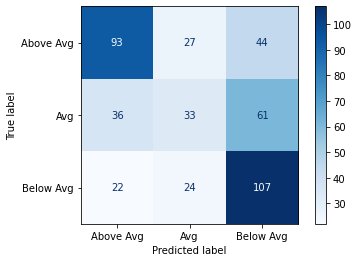

In [431]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
values_format='d', display_labels=['Above Avg', 'Avg','Below Avg']);

### Random Forest

In [432]:
rfc = RandomForestClassifier()
cross_val_score(rfc, X,y, cv=5).mean()

0.5077376832094381

In [472]:
#pipe = Pipeline([('scaler', StandardScaler()),('rfc', RandomForestClassifier(n_estimators=100,max_depth= 2,min_samples_split=5))])
pipe = Pipeline([('scaler', StandardScaler()),('rfc', RandomForestClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  1.0
Validation Score:  0.5369127516778524
[[100  23  41]
 [ 25  39  66]
 [ 27  25 101]]
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       164
           1       0.45      0.30      0.36       130
           2       0.49      0.66      0.56       153

    accuracy                           0.54       447
   macro avg       0.53      0.52      0.52       447
weighted avg       0.54      0.54      0.53       447



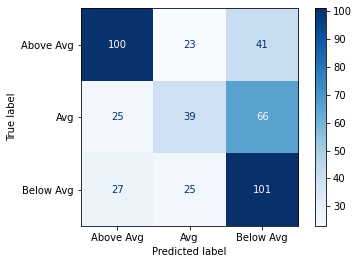

In [473]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
values_format='d', display_labels=['Above Avg', 'Avg','Below Avg']);

#### ADA boost

In [435]:
boost = AdaBoostClassifier()
cross_val_score(boost,X,y,cv=5).mean()

0.5001554960323431

In [436]:
pipe = Pipeline([('scaler', StandardScaler()),('ada', AdaBoostClassifier(n_estimators= 20,base_estimator=DecisionTreeClassifier(max_depth = 1)))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.5548712206047033
Validation Score:  0.5302013422818792
[[109  17  38]
 [ 42  32  56]
 [ 39  18  96]]
              precision    recall  f1-score   support

           0       0.57      0.66      0.62       164
           1       0.48      0.25      0.32       130
           2       0.51      0.63      0.56       153

    accuracy                           0.53       447
   macro avg       0.52      0.51      0.50       447
weighted avg       0.52      0.53      0.51       447



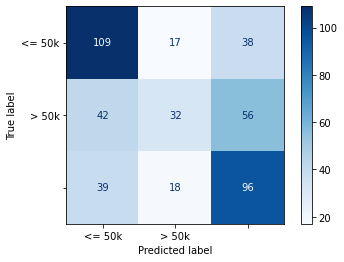

In [437]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['<= 50k', '> 50k','']);

In [438]:
pipe = Pipeline([('scaler', StandardScaler()),('ada', AdaBoostClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.5722284434490481
Validation Score:  0.5123042505592841
[[101  27  36]
 [ 41  35  54]
 [ 33  27  93]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       164
           1       0.39      0.27      0.32       130
           2       0.51      0.61      0.55       153

    accuracy                           0.51       447
   macro avg       0.49      0.50      0.49       447
weighted avg       0.50      0.51      0.50       447



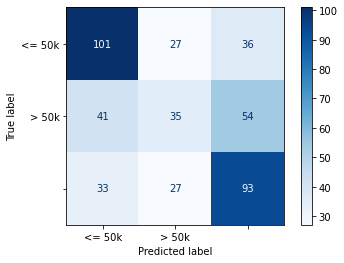

In [439]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['<= 50k', '> 50k','']);

In [440]:
'''ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_params = {
    'n_estimators': [20,50,100],
    'base_estimator__max_depth': [1,2,3],
    'learning_rate': [.1,.9, 1.]
}
gs = GridSearchCV(ada, param_grid=ada_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_'''

"ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())\nada_params = {\n    'n_estimators': [20,50,100],\n    'base_estimator__max_depth': [1,2,3],\n    'learning_rate': [.1,.9, 1.]\n}\ngs = GridSearchCV(ada, param_grid=ada_params, cv=3)\ngs.fit(X_train, y_train)\nprint(gs.best_score_)\ngs.best_params_"

### Extra tree

In [441]:
x_trees = ExtraTreeClassifier()
cross_val_score(x_trees, X,y,cv= 30).mean()

0.42119519519519527

In [442]:
pipe = Pipeline([('scaler', StandardScaler()),('x_tree', ExtraTreeClassifier(max_depth=4))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.4753639417693169
Validation Score:  0.4250559284116331
[[ 60   3 101]
 [ 19   2 109]
 [ 21   4 128]]
              precision    recall  f1-score   support

           0       0.60      0.37      0.45       164
           1       0.22      0.02      0.03       130
           2       0.38      0.84      0.52       153

    accuracy                           0.43       447
   macro avg       0.40      0.41      0.33       447
weighted avg       0.41      0.43      0.35       447



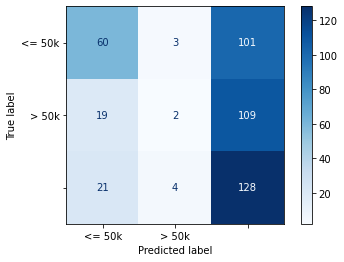

In [443]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['<= 50k', '> 50k','']);

### Decicion Tree

In [444]:
tree = DecisionTreeClassifier()
cross_val_score(tree, X,y,cv=32).mean()

0.45520186335403723

In [445]:
pipe = Pipeline([('scaler', StandardScaler()),('dt', DecisionTreeClassifier(max_depth=4))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.5571108622620381
Validation Score:  0.5279642058165548
[[105  26  33]
 [ 46  38  46]
 [ 28  32  93]]
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       164
           1       0.40      0.29      0.34       130
           2       0.54      0.61      0.57       153

    accuracy                           0.53       447
   macro avg       0.51      0.51      0.51       447
weighted avg       0.52      0.53      0.52       447



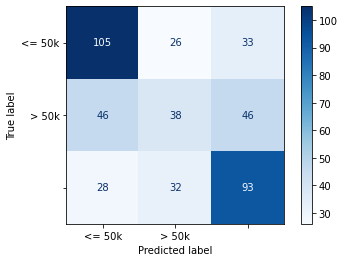

In [446]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['<= 50k', '> 50k','']);

### Gradient boost

In [447]:
boost = GradientBoostingClassifier()
cross_val_score(boost,X,y,cv=30).mean()

0.5319519519519519

In [448]:
'''gboost = GradientBoostingClassifier()
gboost_params = {
    'max_depth': [1,2,3,4],
    'n_estimators': [10,20,50,100,150,200],
    'learning_rate': [.08, .1, .12]
}
gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=30)
gb_gs.fit(X_train, y_train)
print(gb_gs.best_score_)
gb_gs.best_params_'''

"gboost = GradientBoostingClassifier()\ngboost_params = {\n    'max_depth': [2,3,4],\n    'n_estimators': [140,150,160,200],\n    'learning_rate': [.08, .1, .12]\n}\ngb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=30)\ngb_gs.fit(X_train, y_train)\nprint(gb_gs.best_score_)\ngb_gs.best_params_"

In [449]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', GradientBoostingClassifier(max_depth=1,n_estimators=20))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.5487122060470325
Validation Score:  0.5458612975391499
[[114  20  30]
 [ 48  33  49]
 [ 40  16  97]]
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       164
           1       0.48      0.25      0.33       130
           2       0.55      0.63      0.59       153

    accuracy                           0.55       447
   macro avg       0.53      0.53      0.51       447
weighted avg       0.53      0.55      0.53       447



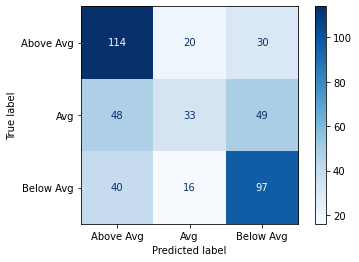

In [450]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
values_format='d', display_labels=['Above Avg', 'Avg','Below Avg']);

### This this the best model, with highes score and not overfitting, I copy this model below to see more detail

In [451]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', GradientBoostingClassifier(n_estimators=10))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.5845464725643897
Validation Score:  0.5369127516778524
[[ 99  16  49]
 [ 35  28  67]
 [ 30  10 113]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       164
           1       0.52      0.22      0.30       130
           2       0.49      0.74      0.59       153

    accuracy                           0.54       447
   macro avg       0.54      0.52      0.50       447
weighted avg       0.54      0.54      0.51       447



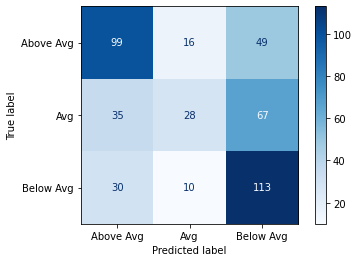

In [452]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
values_format='d', display_labels=['Above Avg', 'Avg','Below Avg']);

### Logistic Regression

In [453]:
logr= LogisticRegression(solver = 'liblinear')
cross_val_score(logr,X,y,cv=30).mean()

0.5222162162162163

In [454]:
#learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10

In [455]:
pipe = Pipeline([('scaler', StandardScaler()),('logr', LogisticRegression(solver = 'liblinear',C = 0.01))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.5755879059350504
Validation Score:  0.5391498881431768
[[108  23  33]
 [ 47  35  48]
 [ 32  23  98]]
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       164
           1       0.43      0.27      0.33       130
           2       0.55      0.64      0.59       153

    accuracy                           0.54       447
   macro avg       0.52      0.52      0.51       447
weighted avg       0.52      0.54      0.52       447



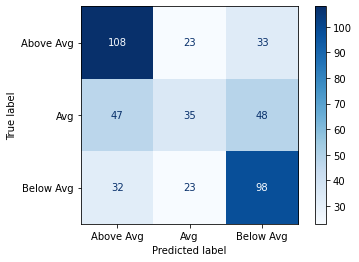

In [456]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
values_format='d', display_labels=['Above Avg', 'Avg','Below Avg']);

### K-NN

In [457]:
knn = KNeighborsClassifier()
cross_val_score(knn, X,y,cv= 5).mean()

0.38376320462274655

In [458]:
pipe = Pipeline([('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors= 30))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Training Score:  0.526875699888018
Validation Score:  0.4988814317673378
[[89 37 38]
 [44 44 42]
 [28 35 90]]
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       164
           1       0.38      0.34      0.36       130
           2       0.53      0.59      0.56       153

    accuracy                           0.50       447
   macro avg       0.49      0.49      0.49       447
weighted avg       0.49      0.50      0.50       447



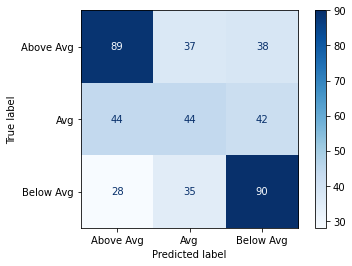

In [459]:
metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
values_format='d', display_labels=['Above Avg', 'Avg','Below Avg']);

### The Best Model : Gradient Boosting Classifier

Training Score:  0.5487122060470325
Validation Score:  0.5458612975391499
[[114  20  30]
 [ 48  33  49]
 [ 40  16  97]]
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       164
           1       0.48      0.25      0.33       130
           2       0.55      0.63      0.59       153

    accuracy                           0.55       447
   macro avg       0.53      0.53      0.51       447
weighted avg       0.53      0.55      0.53       447



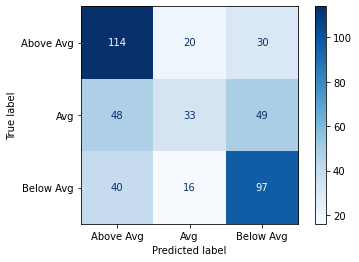

In [474]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', GradientBoostingClassifier(max_depth=1,n_estimators=20))])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_test, y_test))
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

metrics.plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', 
values_format='d', display_labels=['Above Avg', 'Avg','Below Avg']);

This model has the higest score 55% among the others ,beat the base line (36%), and no overfitting. But we can see from the confusion matrix, it does not predict average class really good. The average class (class 1) has the least data among the other classes

In [479]:
y_test.value_counts(normalize = True).sort_index()

0    0.366890
1    0.290828
2    0.342282
Name: company_rank, dtype: float64

### Check the feature importance

In [485]:
boost = GradientBoostingClassifier(max_depth=1,n_estimators=20)
boost.fit(X_train,y_train)

values = boost.feature_importances_

feat = pd.DataFrame(features)
feat['values'] = values
df_feat = feat.sort_values(by= 'values', ascending=False).head(15)

In [486]:
df_feat.columns = ['features','values']
df_feat

,features,values
5,benefits_score,0.543812
80,category_Education,0.127270
2,jobs_count,0.095082
4,interview_difficulty,0.089985
1,size,0.079385
49,employee_discount,0.025324
86,category_Manufacturing,0.019337
92,category_Retail,0.012964
48,total_perk_discounts_benefits,0.002672
41,total_vacation_time_off_benefits,0.002192


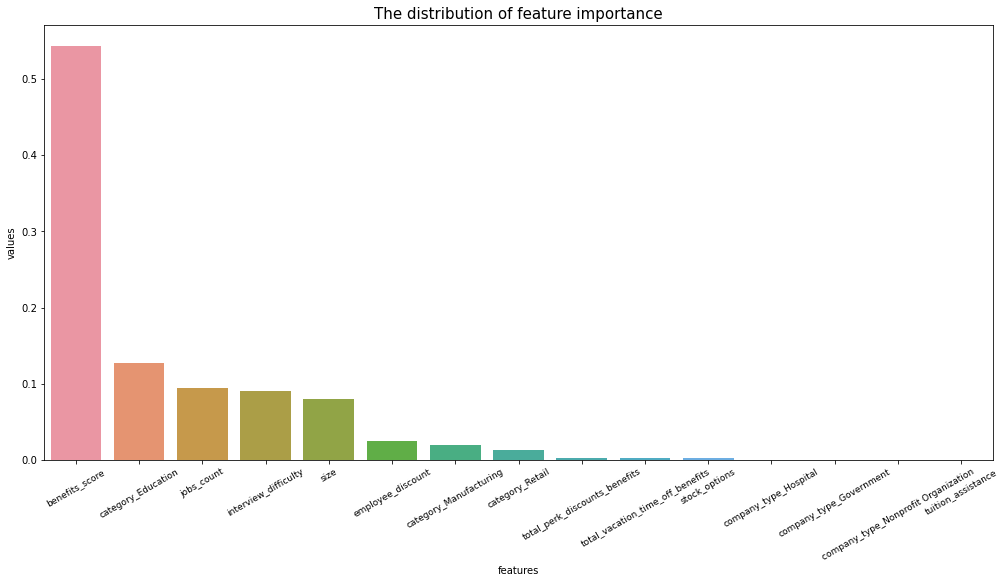

In [487]:
plt.figure(figsize = (17,8))
plt.title('The distribution of feature importance',fontsize = 15)
sns.barplot(x = 'features',y = 'values', data = df_feat)
#df_feat.plot(kind='bar')
plt.xticks(rotation = 30, fontsize = 9)
plt.yticks(rotation = 0, fontsize = 10);

From the distribution of feature importance table and diagram, we can see the benefit score is the most informative feature, follow by education company category, company job posting counts, the difficulty of interview, company size, employee discount benefit, manufacturing company category, retail company category, total perk discount benefits, total vacation and time off benefit, and stock option benefit.